## '여친 선물' 검색어로 워드 클라우드 만들기wordCloud
### 네이버 지식인 Crawling

In [10]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from urllib.parse import quote
import math

In [11]:
driver = webdriver.Chrome('../05.Crawling/chromedriver')
search = quote('남자친구 선물')
kin_url = 'https://kin.naver.com/search/list.nhn'

In [12]:
url = f'{kin_url}?query={search}&page=1'
driver.get(url)
time.sleep(1)

ul = driver.find_element_by_css_selector('.basic1')
lis = ul.find_elements_by_tag_name('li')
ans_href_list = []
for li in lis:
    atag = li.find_element_by_tag_name('a')
    ans_href = atag.get_attribute('href')
    ans_href_list.append(ans_href)

In [13]:
driver.get(ans_href_list[0])
time.sleep(1)
count = int(driver.find_element_by_css_selector('._answerCount.num').text)
count

10

In [14]:
#글이 5개일때; 5-1 4/5 = 0.8 math.floor0이라서 더보기안누름
for next in range(math.floor((count-1)/5)):
    more = driver.find_element_by_id('nextPageButton')
    more.click()
    time.sleep(1)

In [15]:
#답변들을 찾아서 반복문
answers = driver.find_elements_by_css_selector('._endContentsText.c-heading-answer__content-user')
for i, answer in enumerate(answers): #이해를돕기위해 하나씩 enumerate
    print(f'{i}==================================================')
    print(answer.text) #텍스트만 뽑기

0==================================================
남자들 키링 선물 괜찮아요.
구찌 [더힐스] 오피디아 키 체인 웹 키링 523161 HE2NG 8742
COUPANG
coupa.ng
파트너스 활동을 통해 일정액의 수수료를 제공받을 수 있음
1==================================================
의료용소재로 제작해 다른 팔찌보다
변색없이 오래가는 커플팔찌 추천드려요 ❤
[당일배송][써지컬스틸] 토글바 하트시그널 커플 우정 체인 팔찌 : 미쁜지
[미쁜지] Hand made, daily Accessories mall
naver.me
2==================================================
안녕하세요 공연기획사 파릇입니다:)
크리스마스 겸 남자친구 생일이어서 선물로 고민 많으시겠어요!
질문자님의 고민을 덜어드리기 위해서 최선을 다해서 선물 추천해 드릴게요~!
먼저 커플템으로 선물하기 좋은 모자 입니다.
볼캡, 비니, 버킷햇 등 정말 다양한 종류의 모자들이 있습니다ㅎㅎ
아무래도 모자가 가격대가 적당하면서도 디자인, 색상이 다양한 제품들이 많아서 커플템으로 사기에 무난하면서도 실용적인 것 같아요! 링크 남길테니까 참고하세요^^
나이키(NIKE) [세트상품] 레가시91 테크 스우시 캡 - 47,900 | 무신사 스토어
제품분류 : 모자 > 캡/야구 모자 브랜드 : 나이키(NIKE) 제품번호 : BV1076-010 + BV1076-100 제품 : [세트상품] 레가시91 테크 스우시 캡 - 47,900 원산지 : 베트남
store.musinsa.com
엠엘비(MLB) 젤리 비니 NY (BLACK) - 36,000 | 무신사 스토어
제품분류 : 모자 > 비니 브랜드 : 엠엘비(MLB) 제품번호 : 32CPB5011-50L 제품 : 젤리 비니 NY (BLACK) - 36,000 원산지 : 중국
store.musinsa.com
바잘(VARZAR) 헤링본 라벨 버킷햇

## 1 ~ 10 페이지 한꺼번에 돌리기

In [16]:
gift_text = ''##추가1
for page in range(1,11):                            #지식인에서 1~10페이지찾아들어가기
    url = f'{kin_url}?query={search}&page={page}'
    driver.get(url)
    print(page, end=' ')##몇페이지했나 찍어보기 tqdm비슷ㅋ
    time.sleep(1)

    ul = driver.find_element_by_css_selector('.basic1')
    lis = ul.find_elements_by_tag_name('li')

    ans_href_list = []
    for li in lis:                                  #답변페이지 href찾아내기
        atag = li.find_element_by_tag_name('a')
        ans_href = atag.get_attribute('href')
        ans_href_list.append(ans_href)
    time.sleep(1)

    for ans_href in ans_href_list:                  #각각에 대한 답변카운트찾아내기
        driver.get(ans_href)
        time.sleep(1)
        count = int(driver.find_element_by_css_selector('._answerCount.num').text)
        #print(count)
        for next in range(math.floor((count-1)/5)):     #답변카운트에 맞춰 더보기 클릭
            more = driver.find_element_by_id('nextPageButton')
            more.click()
            time.sleep(1)
                                                    #답변갯수만큼 CSS Selector셀렉트찾아 텍스트꺼내기 > 말뭉치완성
        answers = driver.find_elements_by_class_name('_endContentsText.c-heading-answer__content-user')
        for answer in answers:
            #print('#', sep='', end='')
            gift_text += '\n' + answer.text##추가2
        #print()
        time.sleep(1)

1 2 3 4 5 6 7 8 9 10 

In [18]:
#파일저장(기존파일없지만 오픈부터시작ㅋㅋ) 어렵게긁어모은데이터!!
file = open('./result/boygift.txt', 'w', encoding='utf-8')
file.write(gift_text)
file.close()

## 명사추출

In [114]:
#파일열기
gift_text = open('./result/boygift.txt', encoding='utf-8').read()

In [115]:
from konlpy.tag import Okt
okt = Okt()

In [116]:
#명사추출하는데 시간걸림
tokens = okt.nouns(gift_text)
tokens[:10]

['남자', '키링', '선물', '구찌', '더', '힐스', '오피', '디아', '키', '체인']

In [117]:
# 영문자, 숫자 제거
import re
new_gift_text = []
for token in tokens:
    text = re.sub('[a-zA-Z0-9]', '', token)
    new_gift_text.append(text)

In [118]:
new_gift_text[:10]

['남자', '키링', '선물', '구찌', '더', '힐스', '오피', '디아', '키', '체인']

In [119]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

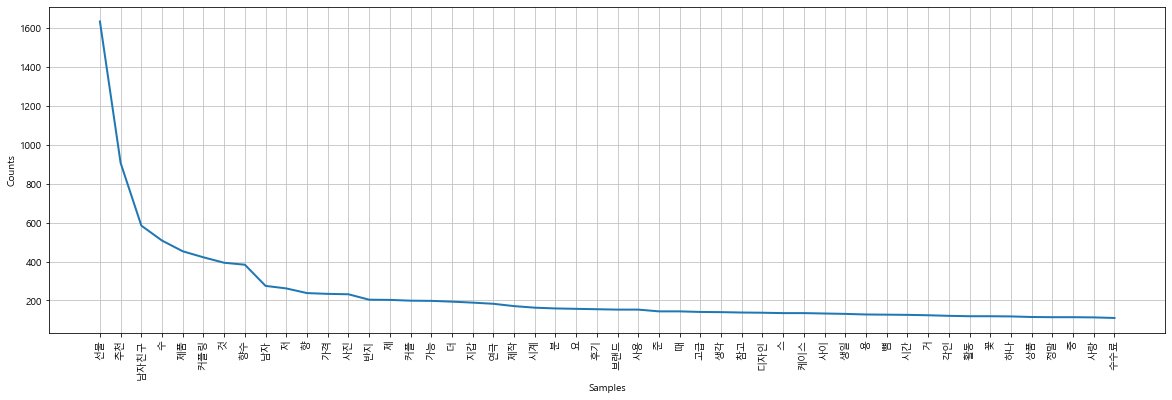

In [120]:
import nltk
bf_gift = nltk.Text(new_gift_text, name='남친 선물')
plt.figure(figsize=(20,6))
bf_gift.plot(50)
plt.show()

In [129]:
#계속추가하면 품질좋아짐/ 제거할단어
stop_words = ['선물','추천','남자친구','수','제품','것','저','가격','더','분','요','후기','사용','참고','디자인','스','수수료','웹','힐스','오피','디아','파트너','활동','통해','정액','제공','소재','변색','당일','배송','남자','제','제작','준','때','직접','마음','개','해','나','링크','남성','고민','남녀','인기','구매','가능','사이','뼘','하나','상품','게','정말','이','때문','마감','가성','비','맞춤','준비','도움','네이버','할인','변경','판매','한번','요즘','쇼핑','오늘','착용','가능','스토어','세트','관람','도','미쁜','기획사','파릇입니','겸','생일','질문','자','컬','다른','우정','위해','최선','다해','먼저','종류','브랜드','고급','생각','건','가능','협찬','실용','곳','전','미안','위','드','느낌','미안','등','대가','색상','커플','시그널','중','레','사기','테크','우시','번호','무난','원산지','중국','베트남','미만','그냥','여자친구','저희','안쪽','가지','의미','아이템','처리','오','구성','토스','선택','조금','정도','심플','애매','마켓','가장','여자','직구','채택','가족','답변','이벤트','부담','사랑','보통','감동']
new_gift_text = [word for word in new_gift_text if word not in stop_words]
print(new_gift_text[:50])

['키링', '구찌', '키', '체인', '키링', '의료', '용', '팔찌', '팔찌', '스틸', '토글바', '하트', '체인', '팔찌', '공연', '크리스마스', '템', '모자', '볼캡', '비니', '버킷', '햇', '모자', '모자', '템', '나이키', '가시', '캡', '분류', '모자', '캡', '야구', '모자', '나이키', '가시', '캡', '엠엘비', '젤리', '비니', '분류', '모자', '비니', '엠엘비', '젤리', '비니', '바', '헤링본', '라벨', '버킷', '햇']


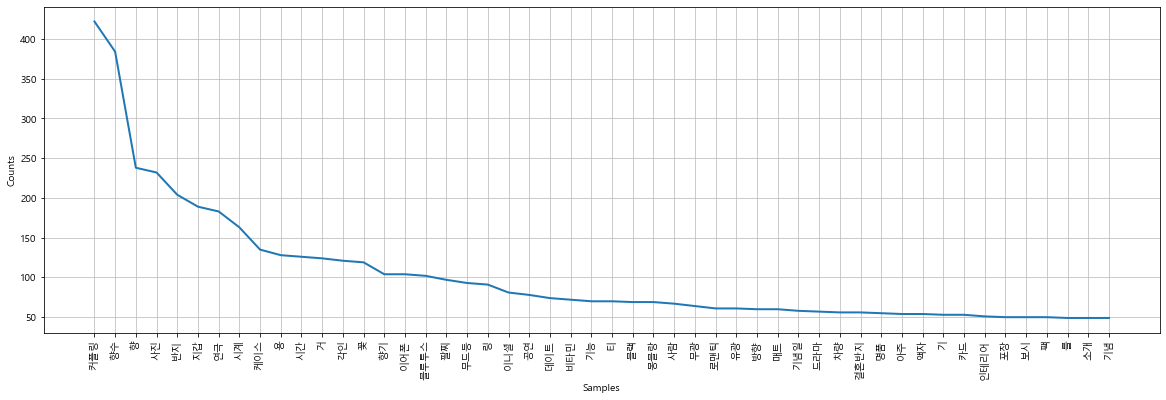

In [130]:
#단어제거후, 다시확인
bf_gift = nltk.Text(new_gift_text, name='남친 선물')
plt.figure(figsize=(20,6))
bf_gift.plot(50)
plt.show()

## 워드클라우드그리기

In [131]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

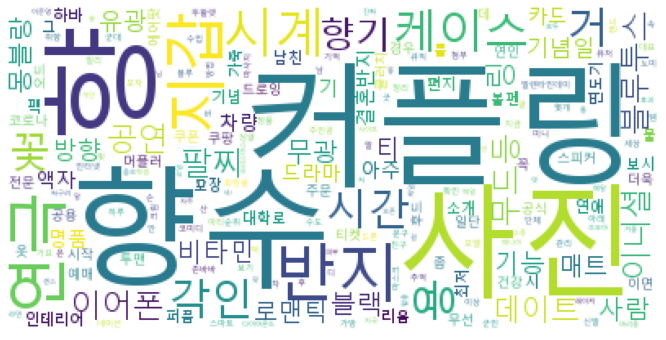

In [132]:
data = bf_gift.vocab().most_common(300)  #자주나온 300단어

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [134]:
mask = np.array(Image.open('./data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [135]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.3, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data)) #데이터의 발생빈도에따라 사이즈
default_colors = wordcloud.to_array()

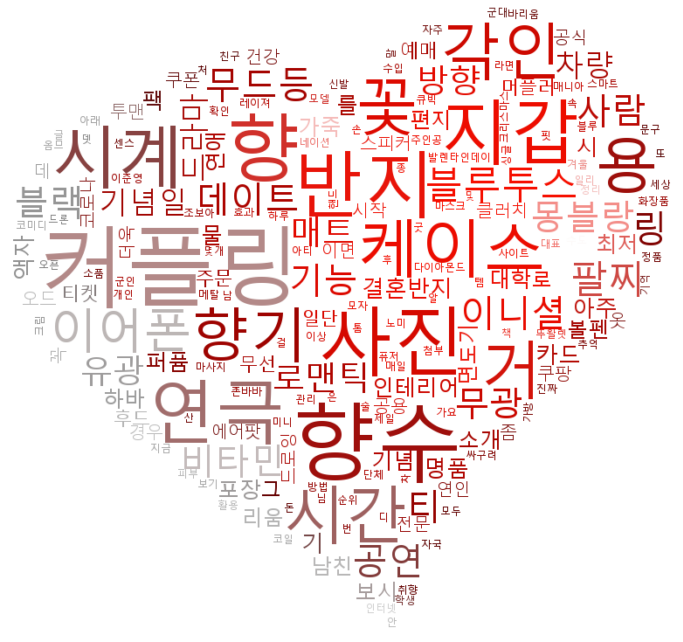

In [136]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear') #이미지컬러따라 빨간글씨가 됨
plt.axis('off')
plt.show()

In [155]:
data = bf_gift.vocab().most_common(2000)  # 단어수를 늘리고 배경,글자색상바꿔서 시도해봄
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.3, mask=mask,
               background_color = 'black',
               colormap='Blues',  #글자색상추가 "wordcloud색상" 구글링
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))
default_colors = wordcloud.to_array()

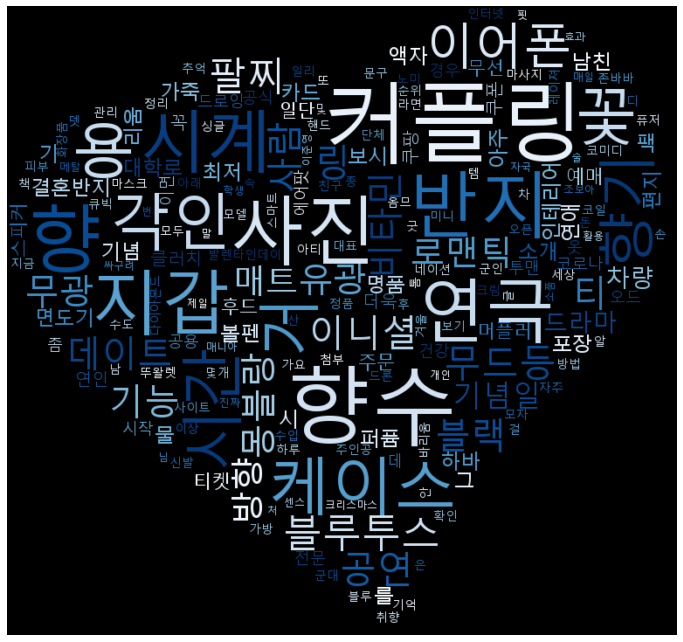

In [156]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()